In [3]:
#Download the tools for downloading the dataset directly from the google drive.
#This can save a lot of time.
!pip install gdown
!gdown --folder https://drive.google.com/drive/folders/1qTTTaHAp8HOnvxnKi1RXp-bC7sito9DF


You should consider upgrading via the 'C:\Users\ned20\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip' command.


Processing file 1Pz46-yHnziPzPBS-W_rTLsgzP_lDpLyI 1.training.zip
Processing file 1o5IEwLwNfrsbOTxK2Tjo1btGjjoUsecT 2.validation.zip
Processing file 1hZn3ZwgzIiHT2poxc6lNVslZVKk3aQyB 3.testing.zip
Processing file 1oKVhiJWSyFQT2x0GI0NCYd02hNWgzsVS mask.zip
Building directory structure completed


Retrieving folder list
Retrieving folder list completed
Building directory structure
Downloading...
From (uriginal): https://drive.google.com/uc?id=1Pz46-yHnziPzPBS-W_rTLsgzP_lDpLyI
From (redirected): https://drive.google.com/uc?id=1Pz46-yHnziPzPBS-W_rTLsgzP_lDpLyI&confirm=t&uuid=3bb09bb6-f299-4346-829c-73c9222255f5
To: c:\Users\ned20\Documents\GitHub\CPSC_599_PROJECT\WSSS4LUAD\1.training.zip

  0%|          | 0.00/1.23G [00:00<?, ?B/s]
  0%|          | 524k/1.23G [00:00<05:18, 3.85MB/s]
  0%|          | 4.72M/1.23G [00:00<00:52, 23.3MB/s]
  1%|          | 8.91M/1.23G [00:00<01:00, 20.0MB/s]
  1%|          | 12.6M/1.23G [00:00<00:55, 22.1MB/s]
  1%|▏         | 16.8M/1.23G [00:00<00:45, 26.9MB/s]
  2%|▏         | 19.9M/1.23G [00:00<00:47, 25.7MB/s]
  2%|▏         | 24.1M/1.23G [00:00<00:41, 29.2MB/s]
  2%|▏         | 29.4M/1.23G [00:01<00:34, 34.4MB/s]
  3%|▎         | 34.6M/1.23G [00:01<00:31, 38.3MB/s]
  3%|▎         | 39.8M/1.23G [00:01<00:28, 41.4MB/s]
  4%|▎         | 44.6M/1.23G [

In [4]:
#Unzip
!tar -xf ./WSSS4LUAD/1.training.zip

In [5]:
!ls -al ./WSSS4LUAD

'ls' is not recognized as an internal or external command,
operable program or batch file.


In [6]:
!pip install torch
!pip install matplotlib
!pip install torchvision
!pip install sklearn

You should consider upgrading via the 'C:\Users\ned20\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\ned20\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\ned20\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\ned20\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip' command.


In [2]:
!pip install scikit-learn

You should consider upgrading via the 'C:\Users\ned20\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip' command.


In [2]:

import glob
import torch
import torch.nn as nn
from matplotlib import pyplot as plt
import torchvision
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split, Dataset, Subset
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from torch import nn, optim
import os
from PIL import Image
from torch.utils.data import Dataset
import re
from collections import Counter
from sklearn.model_selection import train_test_split
from torch.utils.data import Subset
from torch.utils.data import WeightedRandomSampler
from torchvision import models
import random

In [5]:
#TODO: Implement the DigitDataset class here
class DigitDataset(Dataset):
  def __init__(self, path, transformation=None):
    self.path = path
    self.transformation = transformation
    self.allFiles = []
    for name1 in os.listdir(self.path):
      if (name1.endswith(".png")):
        filename = re.sub("[^0-9]", "", name1.split("-")[-1])
        #print(filename)
        if (int(filename, 2) == 1 or int(filename, 2) == 4 or int(filename, 2) == 2):
          self.allFiles.append(self.path + "/" + name1)
    print(self.allFiles)
  def __len__(self):
    return len(self.allFiles)
  def __getitem__(self, index):
    if index >= len(self.allFiles):
      return None, None
    image = Image.open(self.allFiles[index])
    temp = self.allFiles[index].split("/")
    filename = re.sub("[^0-9]", "", temp[-1].split("-")[-1])
    label = int(int(filename, 2) //2)
    if self.transformation != None:
      image = self.transformation(image)
    return image, label
  
class ConditionalNormalize(transforms.Normalize):
    def __init__(self, mean, std, probability=1.0):
        super().__init__(mean=mean, std=std)
        self.probability = probability

    def __call__(self, img):
        if random.random() < self.probability:
            return super().__call__(img)
        return img

In [19]:
transform = transforms.Compose([
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.Resize((232, 232)),     
    transforms.RandomCrop(224),
    transforms.ToTensor(), 
    ConditionalNormalize(mean = [0.485, 0.456, 0.406], std = [0.229, 0.224, 0.225], probability=0.5),   
])

def getSampler(dataset):
  unique, counts = np.unique(dataset, return_counts=True)
  result = {}
  print(len(dataset))
  for n in range(len(counts)):
    result[unique[n]] = 1/counts[n]
    print(n, counts[n], (counts[n]/ len(dataset)))

  return result
training = DigitDataset("./1.training", transform)


X_train, X_test, y_train, y_test, idx1, idx2 = train_test_split(list(training[i][0] for i in range(len(training))), list(training[i][1] for i in range(len(training))),np.arange(len(training)), test_size=0.4)


X_train_a, X_test_a, y_train_a, y_test_a, idx1_a, idx2_a = train_test_split(X_test, y_test,idx2, test_size=0.5)

training_set = Subset(training, idx1)
validation_set = Subset(training, idx1_a)
testing_set = Subset(training, idx2_a)


training_dict = getSampler(list(training_set[i][1] for i in range(len(training_set))))
#training_dict[7] = 0
#training_dict[5] = 0
print(training_dict)
weightedSampling_training = WeightedRandomSampler( list(training_dict[training_set[i][1]] for i in range(len(training_set))), len(training_set) )


validation_dict = getSampler(list(validation_set[i][1] for i in range(len(validation_set))))
#validation_dict[7] = 0
#training_dict[5] = 0
print(validation_dict)
weightedSampling_validation = WeightedRandomSampler( list(validation_dict[validation_set[i][1]] for i in range(len(validation_set))), len(validation_set) )

test_dict = getSampler(list(testing_set[i][1] for i in range(len(testing_set))))
#validation_dict[7] = 0
#training_dict[5] = 0
print(test_dict)
weightedSampling_Test = WeightedRandomSampler( list(test_dict[testing_set[i][1]] for i in range(len(testing_set))), len(testing_set) )


#See the distribution
ll = []
for n in os.listdir("./1.training"):
  element = re.sub("[^0-9]", "", n.split("-")[-1])
  if (element == ''):
    print(n)
  ll.append(element)
c = Counter( ll )

print( c.items() )


['./1.training/1003370-11223-43756-[0, 1, 0].png', './1.training/1003370-13087-11698-[0, 1, 0].png', './1.training/1003370-13087-27727-[0, 1, 0].png', './1.training/1003370-13087-31289-[0, 1, 0].png', './1.training/1003370-13087-36632-[0, 1, 0].png', './1.training/1003370-13087-49099-[0, 1, 0].png', './1.training/1003370-13087-50880-[0, 1, 0].png', './1.training/1003370-14951-13479-[0, 1, 0].png', './1.training/1003370-14951-20603-[0, 1, 0].png', './1.training/1003370-14951-38413-[0, 1, 0].png', './1.training/1003370-14951-40194-[0, 1, 0].png', './1.training/1003370-14951-52661-[0, 1, 0].png', './1.training/1003370-16815-18822-[0, 1, 0].png', './1.training/1003370-16815-20603-[0, 1, 0].png', './1.training/1003370-16815-24165-[0, 1, 0].png', './1.training/1003370-16815-25946-[0, 1, 0].png', './1.training/1003370-16815-27727-[0, 1, 0].png', './1.training/1003370-16815-29508-[0, 1, 0].png', './1.training/1003370-16815-31289-[0, 1, 0].png', './1.training/1003370-16815-36632-[0, 1, 0].png',

In [20]:

len(training_set)

2815

Total Number of Images 1083
tensor([[[0.8706, 0.8314, 0.8667,  ..., 0.7333, 0.8706, 0.8784],
         [0.8314, 0.7725, 0.8431,  ..., 0.7333, 0.8549, 0.8314],
         [0.5686, 0.5804, 0.7294,  ..., 0.8667, 0.8235, 0.8510],
         ...,
         [0.8157, 0.7765, 0.8235,  ..., 0.8196, 0.8118, 0.7765],
         [0.8078, 0.7333, 0.8235,  ..., 0.7922, 0.8235, 0.7294],
         [0.7765, 0.7922, 0.8824,  ..., 0.7529, 0.8471, 0.7412]],

        [[0.6235, 0.5804, 0.6627,  ..., 0.4902, 0.6157, 0.6353],
         [0.5098, 0.4353, 0.5059,  ..., 0.5020, 0.6275, 0.5255],
         [0.3412, 0.3294, 0.4196,  ..., 0.6588, 0.5569, 0.5098],
         ...,
         [0.6392, 0.4824, 0.5098,  ..., 0.4745, 0.4706, 0.4471],
         [0.6471, 0.4510, 0.5176,  ..., 0.4353, 0.4510, 0.4039],
         [0.6157, 0.5373, 0.6235,  ..., 0.3922, 0.4706, 0.4078]],

        [[0.8118, 0.7412, 0.8039,  ..., 0.6902, 0.7490, 0.7961],
         [0.7216, 0.6314, 0.6588,  ..., 0.6902, 0.7765, 0.7373],
         [0.5961, 0.5686, 0.61

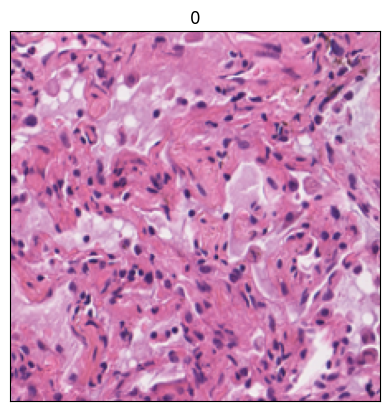

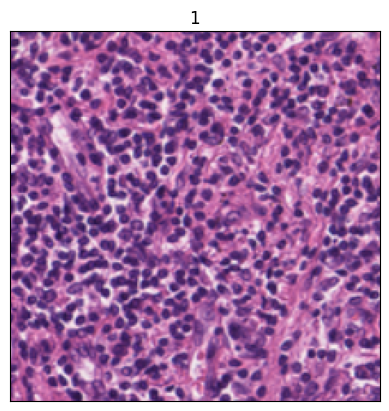

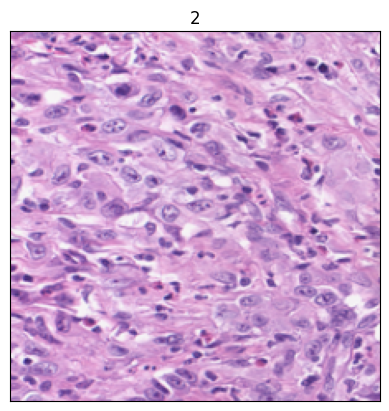

In [21]:
#From Class
def visualize(image, label):
  print(image)
  image = image.permute(1, 2, 0)
  image = image.numpy()
  plt.figure()
  plt.imshow(image)
  plt.title(str(label))
  plt.xticks([])
  plt.yticks([])

for i in range(5):

  groupImages = list(filter(lambda x: x[1] ==i, training_set))
  print("Total Number of Images", len(groupImages))
  if (len(groupImages) > 0):
    for j in range(1):
        visualize(groupImages[j][0], groupImages[j][1])

In [22]:
def freeze(model):
  for param in model.parameters():
    param.requires_grad = False

# unfreeze the parameters of the first layer
def unfreeze(model):
  for param in model.layer1.parameters():
    param.requires_grad = True

In [23]:
model = models.resnet50(weights='IMAGENET1K_V2')
freeze(model)

for param in model.layer2.parameters():
    param.requires_grad = True
for param in model.layer3.parameters():
    param.requires_grad = True
for param in model.layer4.parameters():
    param.requires_grad = True
    
classifier = nn.Sequential(
    nn.Linear(in_features=2048, out_features=3)
    )
model.fc = classifier

In [24]:
batch_size = 64
data_loader_training = DataLoader(training_set, batch_size=batch_size, sampler=weightedSampling_training)
data_loader_validate = DataLoader(validation_set, batch_size=batch_size, sampler=weightedSampling_validation)
data_loader_test = DataLoader(validation_set, batch_size=batch_size, sampler=weightedSampling_Test)

In [25]:
#TODO implement

def evaluation(model, loader, criterion, device, phase='Valid'):
  model.eval()
  predictions = []
  ground_truth = []
  with torch.no_grad():
    total_loss = 0
    total  = 0
    correct = 0
    for batch_index, (images, labels) in enumerate(loader):
      #images = images.to(device)
      #labels = labels.to(device)
      outputs = model(images)
      loss = criterion(outputs, labels)
      total_loss += loss.item() * images.size(0)
      total += images.size(0)
      _, preds = torch.max(outputs, 1)
      predictions.extend(preds.cpu().numpy())
      ground_truth.extend(labels.cpu().numpy())
      correct += (preds == labels).sum().item()
    accuracy = correct / total
    loss = total_loss / total
    print(f'     {phase} Accuracy={accuracy:<10.4f}  Loss= {loss:<10.4f}')
    return {'loss': loss,
            'accuracy': accuracy,
            'ground_truth': ground_truth,
            'predictions': predictions}

#Training function
#model = the inital model we want to train
#training= training dataset loader
#validation = validation dataset loader
#criterion = Cross entropy loss
#optimizer = optimizer
#epoches = number of times we need to train the model
def training(model, train_loader, valid_loader, criterion, optimizer, device,
             epochs, best_model_path):
  model.train()
  best_loss = torch.inf
  best_restults = None
  for epoch in range(epochs):
    total_loss = 0
    total  = 0
    correct = 0
    for batch_index, (images, labels) in enumerate(train_loader):
      optimizer.zero_grad()
      #images = images.to(device)
      #labels = labels.to(device)
      outputs = model(images)
      #print("outputs", outputs)
      #print("labels", labels)
      loss = criterion(outputs, labels)
      loss.backward()
      optimizer.step()
      total_loss += loss.item() * images.size(0)
      total += images.size(0)
      _, preds = torch.max(outputs, 1)
      correct += (preds == labels).sum().item()
      #print("preds",preds)
      #print("labels",labels)
      #print(loss.item())
      #print(total_loss)
    accuracy = correct / total
    loss = total_loss / total
    print(f'{epoch:<4} Train Accuracy={accuracy:<10.4f}  Loss= {loss:<10.4f}')
    results = evaluation(model, valid_loader, criterion, device)
    if results['loss'] < best_loss:
      torch.save(model, best_model_path)
      best_loss = results['loss']
      best_restults = results
    print()
  return best_restults

In [26]:

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.005, momentum=0.9)
epoches = 50

best_model_path = 'best_model.pt'
best_restults = training(model, data_loader_training, data_loader_validate, criterion,
                         optimizer, "", epoches, best_model_path)

0    Train Accuracy=0.7439      Loss= 0.7318    
     Valid Accuracy=0.9095      Loss= 0.3071    

1    Train Accuracy=0.8107      Loss= 0.4761    
     Valid Accuracy=0.8094      Loss= 0.5135    

2    Train Accuracy=0.8742      Loss= 0.3217    
     Valid Accuracy=0.9478      Loss= 0.1720    

3    Train Accuracy=0.8647      Loss= 0.3302    
     Valid Accuracy=0.9148      Loss= 0.2162    

4    Train Accuracy=0.9279      Loss= 0.1889    
     Valid Accuracy=0.9670      Loss= 0.1245    

5    Train Accuracy=0.9552      Loss= 0.1109    
     Valid Accuracy=0.9244      Loss= 0.2242    

6    Train Accuracy=0.9350      Loss= 0.1828    
     Valid Accuracy=0.9244      Loss= 0.2845    

7    Train Accuracy=0.9563      Loss= 0.1344    
     Valid Accuracy=0.8637      Loss= 0.3476    

8    Train Accuracy=0.9240      Loss= 0.2161    
     Valid Accuracy=0.9670      Loss= 0.1088    

9    Train Accuracy=0.9641      Loss= 0.0985    
     Valid Accuracy=0.9649      Loss= 0.1199    

10   Train

KeyboardInterrupt: 

In [31]:
def evaluationFinal(model, dataLoader, criterion):
  #set the eval mode
  model.eval()
  #Keep track of the predicted and truth values
  predictValue = []
  actualValue = []
  with torch.no_grad():
    total = 0
    correct = 0
    total_loss = 0
    for batch_index, (image, label) in enumerate(dataLoader):
      #test the model
      outputs = model(image)
      #Get the loss
      loss = criterion(outputs, label)
      #caculate total loss
      total_loss += loss.item() * image.size(0)
      #Total number of samples
      total += image.size(0)
      #Get the prediction
      maximum, index = torch.max(outputs, 1)
      #Get the number of correct prediction
      correct += torch.sum(torch.eq(label, index), dim=0).item()
      #Append the results to the array
      predictValue.extend(index.numpy())
      actualValue.extend(label.numpy())

    #calculate stats
    accuracy = correct / total
    loss = total_loss / total
    stat = getResult(actualValue, predictValue)
    print("Valiation")
    print("accuracy", accuracy)
    print("loss",loss)
    print("sensitivity",stat[0])
    print("specificity",stat[1])
    print("precision",stat[2])
  return loss

#Get the specific parameters
def getResult(target, predicted):
  
  confusion_matrix = np.array([
      [0, 0, 0],
      [0, 0, 0],
      [0, 0, 0]
  ])

  for i in range(len(target)):
    confusion_matrix[target[i], predicted[i]] += 1


  #sensitivity, aka recall, TruePositives / (TruePositives + FalseNegatives)
  sensitivity = []
  for i in range(3):
    if (np.sum(confusion_matrix[i, :]) == 0):
      sensitivity.append(0)
    else:
      sensitivity.append(confusion_matrix[i,i] / np.sum(confusion_matrix[i, :]))
  #sensitivity = sensitivity / 10

  #Specificity = TN / (TN + FP)
  specificity = []
  for i in range(3):
    tn = np.sum(confusion_matrix) - np.sum(confusion_matrix[:, i])- np.sum(confusion_matrix[i, :]) + confusion_matrix[i, i]
    fp = np.sum(confusion_matrix[:, i]) - confusion_matrix[i, i]
    if (tn + fp) == 0:
      specificity.append(0)
    else:
      specificity.append(tn / (tn + fp))
  #specificity = specificity / 10

  #Precision = TP / (TP + FP)
  precision = []
  for i in range(3):
    if ((np.sum(confusion_matrix[:, i])) == 0):
      precision.append(0)
    else:
      precision.append(confusion_matrix[i, i] / (np.sum(confusion_matrix[:, i])))
  #precision = precision / 10
  return np.mean(sensitivity), np.mean(specificity), np.mean(precision)

In [32]:
best_model = torch.load("./best_model.pt")
results = evaluationFinal(best_model, data_loader_test, criterion)
print(results)

Valiation
accuracy 0.966986155484558
loss 0.0851729168329503
sensitivity 0.9711777208350715
specificity 0.9826447925365648
precision 0.9674493236652033
0.0851729168329503
